In [3]:
import requests
import re
from datetime import datetime
from bs4 import BeautifulSoup
import pandas as pd

## 1. KLM Royal Dutch Airlines

In [4]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None

            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/klm-royal-dutch-airlines/'
airline_name = 'KLM'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_klm = pd.DataFrame(my_data)

Number of reviews:  1471


## 2. Lufthansa

In [5]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} # where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/lufthansa/'
airline_name = 'Lufthansa'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_lufthansa = pd.DataFrame(my_data)

Number of reviews:  2203


## 3. Ryanair

In [7]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None  
                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/ryanair/'
airline_name = 'Ryanair'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_ryanair = pd.DataFrame(my_data)

Number of reviews:  2158


## 4. British Airways

In [8]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/british-airways/'
airline_name = 'British Airways'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_british_airways = pd.DataFrame(my_data)

Number of reviews:  3541


## 5. EasyJet

In [9]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/easyjet/'
airline_name = 'EasyJet'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_easyjet = pd.DataFrame(my_data)

Number of reviews:  1422


## 6. Air France

In [10]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/air-france/'
airline_name = 'Air France'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_air_france = pd.DataFrame(my_data)

Number of reviews:  1246


## 7. Turkish Airlines

In [11]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/turkish-airlines/'
airline_name = 'Turkish Airlines'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_turkish_airlines = pd.DataFrame(my_data)

Number of reviews:  2301


## 8. Norwegian Air Shuttle

In [12]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/norwegian/'
airline_name = 'Norwegian'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_norwegian = pd.DataFrame(my_data)

Number of reviews:  1307


## 9. Scandinavian Airlines System (SAS)

In [13]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/sas-scandinavian-airlines/'
airline_name = 'SAS'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_sas = pd.DataFrame(my_data)

Number of reviews:  844


## 10. Iberia

In [14]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/iberia/'
airline_name = 'Iberia'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_iberia = pd.DataFrame(my_data)

Number of reviews:  852


## 11. Wizz Air

In [15]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/wizz-air/'
airline_name = 'Wizz Air'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_wizz_air = pd.DataFrame(my_data)

Number of reviews:  1267


## 12. ITA Airways

In [16]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/ita-airways/'
airline_name = 'ITA Airways'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_ita = pd.DataFrame(my_data)

Number of reviews:  77


## 13. Swiss International Air Lines

In [17]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/swiss-international-air-lines/'
airline_name = 'Swiss International Air Lines'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_swiss = pd.DataFrame(my_data)

Number of reviews:  967


## 14. Aeroflot Russian Airlines

In [18]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/aeroflot-russian-airlines/'
airline_name = 'Aeroflot'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_aeroflot = pd.DataFrame(my_data)

Number of reviews:  592


## 15. TAP Portugal

In [19]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/tap-portugal/'
airline_name = 'TAP Portugal'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_tap = pd.DataFrame(my_data)

Number of reviews:  1390


## 16. Virgin Atlantic

In [20]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/virgin-atlantic-airways/'
airline_name = 'Virgin Atlantic'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_virgin_atlantic = pd.DataFrame(my_data)

Number of reviews:  820


## 17. Finn Air

In [21]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/finnair/'
airline_name = 'Finn Air'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_finn_air = pd.DataFrame(my_data)

Number of reviews:  855


## 18. Brussels Airlines

In [22]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/brussels-airlines/'
airline_name = 'Brussels Airlines'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_brussels_airlines = pd.DataFrame(my_data)

Number of reviews:  527


## 19. Vueling

In [23]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/vueling-airlines/'
airline_name = 'Vueling Airlines'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_vueling = pd.DataFrame(my_data)

Number of reviews:  1173


## 20. Iceland Air

In [24]:
def getRatingRecords(airline_url, airline_name):
    data = [] #list of records
    page_number = 1
    while True: # loop until there are no more pages
        url = airline_url + 'page/' + str(page_number) + '/'
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")
        allarticles = soup.findAll('article')
        articles = allarticles[0].findAll('article')
        if len(articles) == 0:
            break # no more articles in page, exit loop
        for one in articles:
            record = {} #where the data is stored
            record['airline'] = airline_name
            
            overallRating = one.find('span',{'itemprop': 'ratingValue'})
            if str(overallRating) == 'None':
                overallRating = 0
            else:
                overallRating = one.find('span',{'itemprop': 'ratingValue'}).text
            record['ratingValue'] = overallRating       

            author = one.find('span',{'itemprop': 'name'})
            if author is not None:
                record['author'] = author.text.strip()
            else:
                record['author'] = None
                                
            country_pattern = re.compile(r'\((.*?)\)')
            country = country_pattern.search(str(one))

            if country is not None:
                record['country'] = country.group(1).strip()
            else:
                record['country'] = None
            
            tempdate = one.find('time',{'itemprop': 'datePublished'}).text
            tempdate = re.sub(r'(\d)(st|nd|rd|th)', r'\1', tempdate)
            date_time_obj = datetime.strptime(tempdate, '%d %B %Y')
            record['datePublished'] = date_time_obj

            tmptext = one.find("div", {"class": "text_content"}).text
            text = tmptext.split('|')
            if len(text)>1:
                textindex=1
                verifyindex=0
            else:
                textindex=0
                verifyindex=-1
            record['reviewText'] = text[textindex].strip()

            if verifyindex!=-1:
                if 'Not' in tmptext.split('|')[verifyindex]:
                    record['verified'] = False
                else:
                    record['verified'] = True
            else:
                record['verified'] = False

            for element in one.find_all('tr'):
                rating_element = element.find_all('td')[0]['class'][1]
                stars = len(element.find_all('span',{'class': 'star fill'}))

                if stars == 0:
                    rating_value = (element.find_all('td')[1]).text
                    record[rating_element] = rating_value.strip()
                else:
                    record[rating_element] = int(stars)

            data.append(record)
        page_number += 1

    return data

airline_url = 'https://www.airlinequality.com/airline-reviews/icelandair/'
airline_name = 'Icelandair'

my_data = getRatingRecords(airline_url, airline_name)
print('Number of reviews: ', len(my_data))

df_icelandair = pd.DataFrame(my_data)

Number of reviews:  662


## Combine all dataframes

In [25]:
data = pd.concat([df_tap, df_easyjet, df_klm, df_lufthansa, df_ryanair, df_british_airways, 
                 df_air_france, df_turkish_airlines, df_norwegian, df_sas, df_iberia,
                 df_wizz_air, df_ita, df_swiss, df_aeroflot, df_virgin_atlantic,
                 df_finn_air, df_brussels_airlines, df_vueling, df_icelandair])
data.info()

# Export data
data.to_csv('my_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25675 entries, 0 to 661
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   airline                 25675 non-null  object        
 1   ratingValue             25675 non-null  object        
 2   author                  25675 non-null  object        
 3   country                 25648 non-null  object        
 4   datePublished           25675 non-null  datetime64[ns]
 5   reviewText              25675 non-null  object        
 6   verified                25675 non-null  bool          
 7   aircraft                8870 non-null   object        
 8   type_of_traveller       18398 non-null  object        
 9   cabin_flown             25634 non-null  object        
 10  route                   18362 non-null  object        
 11  date_flown              18362 non-null  object        
 12  seat_comfort            23891 non-null  object  

In [26]:
# Show review of K Sinclair (example in thesis)
pd.set_option('display.max_colwidth', None)
k_sinclair_rows = data[data['author'] == 'K Sinclair']

# print the rows
print(k_sinclair_rows)

   airline ratingValue      author      country datePublished  \
10     KLM          10  K Sinclair  Netherlands    2023-04-13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           reviewText  \
10  My disabled daughter Kirsten travelled on KLM from Amsterdam to Brisbane via Singapore on 17 March (KL835) and returned on 10 April 2023 (KL836). I would just like to express my heartf

## Data Cleaning

In [18]:
# Import data
data = pd.read_csv('my_data.csv')

In [20]:
data.head(5)

,airline,ratingValue,author,country,datePublished,reviewText,verified,aircraft,type_of_traveller,cabin_flown,route,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,recommended,inflight_entertainment,wifi_and_connectivity
0,TAP Portugal,7,Craig Cutts,United Kingdom,2023-05-09,Used TAP from LGW as no direct flight from Hea...,True,A320,Couple Leisure,Business Class,Gatwick to Porto,May 2023,3.0,4.0,4.0,3.0,4.0,yes,NaN,NaN
1,TAP Portugal,1,V Mansell,Belgium,2023-05-09,There were enough counters to check in for bus...,True,A319,Business,Business Class,Lisbon to Brussels,May 2023,1.0,1.0,1.0,2.0,1.0,no,NaN,NaN
2,TAP Portugal,1,Caroline Roettger,United States,2023-05-09,Worst airline ever. I have been in every conti...,False,NaN,Couple Leisure,Economy Class,Amsterdam to Newark via Lisbon,May 2023,1.0,2.0,1.0,1.0,1.0,no,NaN,NaN
3,TAP Portugal,1,alice billman,United States,2023-05-08,I have never encountered such incompetency. Wh...,True,NaN,Solo Leisure,Economy Class,Miami to Lisbon,May 2023,1.0,1.0,1.0,1.0,1.0,no,1.0,1.0
4,TAP Portugal,4,Paul Zuccarelli,Portugal,2023-05-04,The flight was in the morning and on time. The...,True,E190,Business,Economy Class,London Gatwick to Lisbon,May 2023,1.0,3.0,2.0,3.0,2.0,no,1.0,1.0


#### Handling unverified reviews

In [21]:
verified = data.groupby('verified')['reviewText'].count().sort_values(ascending = False)
verified

verified
False    13010
True     12665
Name: reviewText, dtype: int64

In [22]:
# Filter data on verified reviews 
data = data[data['verified'] == True]

#### Handling duplicates

In [23]:
duplicates = data.duplicated().sum()
if duplicates > 0:
    print("The number of duplicates within the dataframe is:", duplicates)
else:
    print("No duplicates found in the dataframe.")

The number of duplicates within the dataframe is: 1


In [24]:
# Drop duplicates
data.drop_duplicates(inplace=True)

C:\Users\70608ebe\AppData\Local\Temp\ipykernel_8664\2215748635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


#### Handling missing or null values

In [25]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

airline                      0
ratingValue                  0
author                       0
country                      0
datePublished                0
reviewText                   0
verified                     0
aircraft                  6690
type_of_traveller            3
cabin_flown                  0
route                        9
date_flown                   4
seat_comfort               914
cabin_staff_service        975
food_and_beverages        3576
ground_service             522
value_for_money              2
recommended                  0
inflight_entertainment    6127
wifi_and_connectivity     9138
dtype: int64


In [26]:
# Drop rows that have missing values in one of these variables
data.dropna(subset=['date_flown', 'reviewText', 'airline', 'verified'], inplace = True)

C:\Users\70608ebe\AppData\Local\Temp\ipykernel_8664\3264433753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['date_flown', 'reviewText', 'airline', 'verified'], inplace = True)


#### Removing irrelevant variables

In [27]:
# data = data.drop('datePublished', axis = 1)
data = data.drop('route', axis = 1)
data = data.drop('recommended', axis = 1)
data = data.drop('aircraft', axis = 1)

In [28]:
data

,airline,ratingValue,author,country,reviewText,verified,type_of_traveller,cabin_flown,date_flown,seat_comfort,cabin_staff_service,food_and_beverages,ground_service,value_for_money,inflight_entertainment,wifi_and_connectivity
0,TAP Portugal,7,Craig Cutts,United Kingdom,Used TAP from LGW as no direct flight from Hea...,True,Couple Leisure,Business Class,May 2023,3.0,4.0,4.0,3.0,4.0,NaN,NaN
1,TAP Portugal,1,V Mansell,Belgium,There were enough counters to check in for bus...,True,Business,Business Class,May 2023,1.0,1.0,1.0,2.0,1.0,NaN,NaN
3,TAP Portugal,1,alice billman,United States,I have never encountered such incompetency. Wh...,True,Solo Leisure,Economy Class,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,TAP Portugal,4,Paul Zuccarelli,Portugal,The flight was in the morning and on time. The...,True,Business,Economy Class,May 2023,1.0,3.0,2.0,3.0,2.0,1.0,1.0
5,TAP Portugal,1,T Alves,Portugal,The flight was cancelled 1hr before departure....,True,Family Leisure,Economy Class,October 2022,1.0,1.0,NaN,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25346,Icelandair,9,K Menzies,Canada,We were pleasantly surprised with the value an...,True,Family Leisure,Economy Class,May 2016,5.0,5.0,3.0,5.0,5.0,4.0,NaN
25347,Icelandair,3,Rajan Parrikar,United States,Roundtrip Seattle to Keflavik in May/June 2016...,True,Solo Leisure,Business Class,June 2016,3.0,5.0,4.0,4.0,3.0,3.0,3.0
25353,Icelandair,8,W Maleski,Canada,The flight from YVR to AMS was delayed by 2 ho...,True,Solo Leisure,Economy Class,May 2016,4.0,5.0,4.0,4.0,5.0,5.0,3.0
25357,Icelandair,7,Charles Horn,United States,We flew Washington Dulles to Reykjavik and bac...,True,Couple Leisure,Business Class,January 2016,3.0,4.0,4.0,4.0,4.0,3.0,4.0


#### Handling non-English reviews

In [32]:
from langdetect import detect

# Define function
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = 'unknown'
    return lang

# Add a new column to the dataframe indicating if review is in English
data['is_english'] = data['reviewText'].apply(lambda x: 1 if detect_language(x) == 'en' else 0)


In [33]:
non_english_reviews = data.loc[data['is_english'] == 0]
non_english_count = data['is_english'].value_counts()[0]
print(f"There are {non_english_count} reviews that are not written in English.")

There are 22 reviews that are not written in English.


In [34]:
# Only keep reviews that are written in English
data = data[data['is_english'] == 1]

#### Anonymization

In [36]:
import hashlib

# Define a function to generate a hash value for each author ID
def anonymize_author(author_id):
    hash_object = hashlib.sha256(str(author_id).encode())
    return hash_object.hexdigest()

# Apply the anonymize_author function to the 'author' column
data['author'] = data['author'].apply(anonymize_author)

C:\Users\70608ebe\AppData\Local\Temp\ipykernel_8664\2753077144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['author'] = data['author'].apply(anonymize_author)


#### Data transformation

##### Creating new columns

In [52]:
# Create new column that indicates the year of date_flown
data['year_flown'] = pd.to_datetime(data['date_flown']).dt.year

# Create new column that indicates the period based on date_flown
data['period'] = (pd.to_datetime(data['date_flown']).dt.year >= 2020).astype(int)


In [55]:
data['period'].value_counts()

0    9082
1    3556
Name: period, dtype: int64

In [54]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12638 entries, 0 to 12637
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   airline                 12638 non-null  object 
 1   ratingValue             12638 non-null  int64  
 2   author                  12638 non-null  object 
 3   country                 12638 non-null  object 
 4   reviewText              12638 non-null  object 
 5   verified                12638 non-null  bool   
 6   type_of_traveller       12636 non-null  object 
 7   cabin_flown             12638 non-null  object 
 8   date_flown              12638 non-null  object 
 9   seat_comfort            11726 non-null  float64
 10  cabin_staff_service     11665 non-null  float64
 11  food_and_beverages      9070 non-null   float64
 12  ground_service          12117 non-null  float64
 13  value_for_money         12636 non-null  float64
 14  inflight_entertainment  6523 non-null 

,airline,ratingValue,author,country,reviewText,verified,type_of_traveller,cabin_flown,date_flown,seat_comfort,...,food_and_beverages,ground_service,value_for_money,inflight_entertainment,wifi_and_connectivity,is_english,year_flown,continent,reviewText_char_count,period
0,TAP Portugal,7,594f7ce5800c4faff13c0518221598fafc95fe7822c1d9...,United Kingdom,Used TAP from LGW as no direct flight from Hea...,True,Couple Leisure,Business Class,May 2023,3.0,...,4.0,3.0,4.0,NaN,NaN,1,2023,Europe,1007,1
1,TAP Portugal,1,aced8334e429b631298259865985f84fedeb92b8e78e98...,Belgium,There were enough counters to check in for bus...,True,Business,Business Class,May 2023,1.0,...,1.0,2.0,1.0,NaN,NaN,1,2023,Europe,747,1
2,TAP Portugal,1,d16285a68ac162b25216d8ed7470985fc6ce8c4682edf2...,United States,I have never encountered such incompetency. Wh...,True,Solo Leisure,Economy Class,May 2023,1.0,...,1.0,1.0,1.0,1.0,1.0,1,2023,North America,855,1
3,TAP Portugal,4,f9e3269773ef1a6724344b180c05776345006cfb8d89f1...,Portugal,The flight was in the morning and on time. The...,True,Business,Economy Class,May 2023,1.0,...,2.0,3.0,2.0,1.0,1.0,1,2023,Europe,262,1
4,TAP Portugal,1,625c592ca227e3251c6538be78698192dc23133f37e052...,Portugal,The flight was cancelled 1hr before departure....,True,Family Leisure,Economy Class,October 2022,1.0,...,NaN,1.0,1.0,NaN,NaN,1,2022,Europe,329,1


In [39]:
# Create new column that indicates the continent (based on the country)
import pycountry_convert as pc

def get_continent(country):
    try:
        # Use pycountry_convert package to get continent code from country name
        country_alpha2 = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        # Use pycountry_convert package to get continent name from continent code
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

# Apply the get_continent function to the "country" column to create the "continent" column
data["continent"] = data["country"].apply(get_continent)

C:\Users\70608ebe\AppData\Local\Temp\ipykernel_8664\665549317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["continent"] = data["country"].apply(get_continent)


In [40]:
data['reviewText_char_count'] = data['reviewText'].apply(lambda x: len(x))
data['reviewText_char_count'].value_counts()
selected_review = data[data['reviewText'].str.len() == 339]['reviewText'].values[0]
print(selected_review)

Verona to Gatwick easyJet flight delayed by more than an hour. No explanation from the airport PA system. I have the mobile app that says flight delayed because of necessary maintenance work before take off at Gatwick. What does that mean? The app maybe be cool but adds nothing to the passenger experience. We are still late and ignorant.


C:\Users\70608ebe\AppData\Local\Temp\ipykernel_8664\235960374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviewText_char_count'] = data['reviewText'].apply(lambda x: len(x))


##### Converting to numeric values

In [41]:
# Convert string variables to numeric
data['seat_comfort'] = pd.to_numeric(data['seat_comfort'], errors='coerce')
data['cabin_staff_service'] = pd.to_numeric(data['cabin_staff_service'], errors='coerce')
data['food_and_beverages'] = pd.to_numeric(data['food_and_beverages'], errors='coerce')
data['inflight_entertainment'] = pd.to_numeric(data['inflight_entertainment'], errors='coerce')
data['value_for_money'] = pd.to_numeric(data['value_for_money'], errors='coerce')

C:\Users\70608ebe\AppData\Local\Temp\ipykernel_8664\1853885030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seat_comfort'] = pd.to_numeric(data['seat_comfort'], errors='coerce')
C:\Users\70608ebe\AppData\Local\Temp\ipykernel_8664\1853885030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cabin_staff_service'] = pd.to_numeric(data['cabin_staff_service'], errors='coerce')
C:\Users\70608ebe\AppData\Local\Temp\ipykernel_8664\1853885030.py:4: SettingWithCopyWarning: 
A value is trying to b

In [56]:
# Export data
data.to_csv('cleaned_data.csv', index=False)

## Exploratory Data Analysis

In [44]:
# Import data
data = pd.read_csv('cleaned_data.csv')

#### Airline

In [2]:
review_counts = data.groupby('airline')['reviewText'].count().sort_values(ascending = False)

# Calculate the total number of reviews
total_reviews = review_counts.sum()

# Calculate the percentage of reviews for each airline
review_percentages = review_counts / total_reviews * 100

# Combine the review counts and percentages into a single dataframe
airline_df = pd.concat([review_counts, round((review_percentages),2)], axis=1, 
                       keys=['review_count', 'review_percentage'])

airline_df = airline_df.sort_values('review_count', ascending=False)

# Print the result dataframe
print(airline_df)

# Create the horizontal bar plot
airline_df['review_count'].plot(kind='barh', figsize=(8,6), color='#171C54')

# Set the title and labels
plt.title('Review Counts per Airline')
plt.xlabel('Review Count')
plt.ylabel('Airline')

# Display the plot
plt.show()

NameError: name 'data' is not defined

#### Rating value

In [ ]:
# Convert the 'ratingValue' column to a numeric datatype
data['ratingValue'] = pd.to_numeric(data['ratingValue'], errors='coerce')

# Calculate the average rating value and standard deviation per airline
airline_stats = data.groupby('airline')['ratingValue'].agg(['mean', 'std'])

# Sort the average rating values in descending order
airline_stats_sorted = airline_stats.sort_values(by='mean', ascending=False)

# Calculate the overall average rating value
overall_avg = data['ratingValue'].mean()
overall_std = data['ratingValue'].std()

# Print the results
print("Overall avg rating value:", round((overall_avg),1))
print("Overall std rating value:", round((overall_std),1))
print("\nAverage rating value and standard deviation per airline (sorted from high to low):\n", 
      round((airline_stats_sorted),1))


#### Type of traveller

In [46]:
traveller_counts = data.groupby('type_of_traveller')['reviewText'].count().sort_values(ascending = False)

# Calculate the total number of travellers
total_travellers = traveller_counts.sum()

# Calculate the percentage of reviews for each airline
travellers_percentages = traveller_counts / total_travellers * 100

# Combine the review counts and percentages into a single dataframe
result_df = pd.concat([traveller_counts, round((travellers_percentages),2)], axis=1, keys=['travellers_count', 'travellers_percentage'])

# Print the result dataframe
print(result_df)

                   travellers_count  travellers_percentage
type_of_traveller                                         
Solo Leisure                   4784                  37.86
Couple Leisure                 3489                  27.61
Business                       2358                  18.66
Family Leisure                 2005                  15.87


In [47]:
traveller_counts = data.groupby(['airline', 'type_of_traveller'])['reviewText'].count().sort_values(ascending=False)

# Calculate the total number of travellers per airline
total_travellers = traveller_counts.groupby('airline').sum()

# Calculate the percentage of reviews for each airline and traveller type
travellers_percentages = traveller_counts.groupby('airline').apply(lambda x: round((x / x.sum() * 100), 2))

# Combine the review counts and percentages into a single dataframe
result_df = pd.concat([travellers_percentages], axis=1, keys=['travellers_percentage'])
result_df = traveller_counts.unstack()

result_df_percentages = round((result_df.div(result_df.sum(axis=1), axis=0) * 100),0)
print(result_df_percentages)

type_of_traveller              Business  Couple Leisure  Family Leisure  \
airline                                                                   
Aeroflot                           22.0            14.0            17.0   
Air France                         21.0            28.0            12.0   
British Airways                    25.0            31.0            13.0   
Brussels Airlines                  29.0            19.0            15.0   
EasyJet                            13.0            30.0            19.0   
Finn Air                           21.0            21.0            12.0   
ITA Airways                        13.0            38.0            17.0   
Iberia                             18.0            34.0            12.0   
Icelandair                          8.0            40.0            20.0   
KLM                                20.0            25.0            13.0   
Lufthansa                          26.0            23.0            14.0   
Norwegian                

#### Cabin flown

In [48]:
cabin_counts = data.groupby('cabin_flown')['reviewText'].count().sort_values(ascending = False)

# Calculate the total number of travellers in each cabin
total_cabins = cabin_counts.sum()

# Calculate the percentage of reviews for each airline
cabins_percentages = cabin_counts / total_cabins * 100

# Combine the review counts and percentages into a single dataframe
result_df = pd.concat([cabin_counts, round((cabins_percentages),2)], axis=1, keys=['cabin_counts', 'cabins_percentages'])

# Print the result dataframe
print(result_df)

                 cabin_counts  cabins_percentages
cabin_flown                                      
Economy Class            9770               77.31
Business Class           2131               16.86
Premium Economy           576                4.56
First Class               161                1.27


In [49]:
cabin_counts = data.groupby(['airline', 'cabin_flown'])['reviewText'].count().sort_values(ascending=False)

# Calculate the total number of cabins per airline
total_cabins = cabin_counts.groupby('airline').sum()

# Calculate the percentage of reviews for each airline and cabin type
cabin_percentages = cabin_counts.groupby('airline').apply(lambda x: round((x / x.sum() * 100), 2))

# Combine the review counts and percentages into a single dataframe
result_df = pd.concat([cabin_percentages], axis=1, keys=['cabin_percentage'])
result_df = cabin_counts.unstack()

result_df_percentages = round((result_df.div(result_df.sum(axis=1), axis=0) * 100),0)
print(result_df_percentages)

cabin_flown                    Business Class  Economy Class  First Class  \
airline                                                                     
Aeroflot                                 12.0           84.0          NaN   
Air France                               20.0           70.0          2.0   
British Airways                          31.0           54.0          5.0   
Brussels Airlines                        15.0           78.0          NaN   
EasyJet                                   NaN          100.0          0.0   
Finn Air                                 36.0           60.0          0.0   
ITA Airways                               8.0           92.0          NaN   
Iberia                                   24.0           72.0          NaN   
Icelandair                               15.0           81.0          1.0   
KLM                                      17.0           79.0          0.0   
Lufthansa                                25.0           68.0          2.0   

#### Date flown

In [50]:
date_flown_count = data.groupby('date_flown')['reviewText'].count().sort_index()

# Calculate the total number of travellers
total_date_flown = date_flown_count.sum()

# Calculate the percentage of reviews for each airline
date_flown_percentages = date_flown_count / total_date_flown * 100

# Combine the review counts and percentages into a single dataframe
result_df = pd.concat([date_flown_count, round((date_flown_percentages),2)], axis=1, keys=['date_flown_count', 'date_flown_percentages'])

# Print the result dataframe
print(result_df)

                date_flown_count  date_flown_percentages
date_flown                                              
April 2016                   132                    1.04
April 2017                   219                    1.73
April 2018                   200                    1.58
April 2019                   238                    1.88
April 2020                    49                    0.39
...                          ...                     ...
September 2018               221                    1.75
September 2019               241                    1.91
September 2020                46                    0.36
September 2021                96                    0.76
September 2022               159                    1.26

[96 rows x 2 columns]


In [63]:
year_flown_count = data.groupby('year_flown')['reviewText'].count().sort_index()

# Calculate the total number of travellers
total_year_flown = year_flown_count.sum()

# Calculate the percentage of reviews for each airline
year_flown_percentages = year_flown_count / total_year_flown * 100

# Combine the review counts and percentages into a single dataframe
result_df = pd.concat([year_flown_count, round((year_flown_percentages),2)], axis=1, keys=['year_flown_count', 'year_flown_percentages'])

# Print the result dataframe
print(result_df)

KeyError: 'year_flown'

In [64]:
date_counts = data.groupby('airline')['date_flown'].count().sort_values(ascending = False)

# Calculate the total number of reviews
total_dates = date_counts.sum()

# Calculate the percentage of reviews for each airline
dates_percentages = date_counts / total_dates * 100

# Combine the review counts and percentages into a single dataframe
result_df = pd.concat([date_counts, round((dates_percentages),2)], axis=1, keys=['date_counts', 'dates_percentages'])

# Print the result dataframe
print(result_df)

                               date_counts  dates_percentages
airline                                                      
British Airways                       1823              14.43
Turkish Airlines                      1253               9.92
Lufthansa                             1217               9.63
Ryanair                               1006               7.96
KLM                                    819               6.48
TAP Portugal                           760               6.02
Wizz Air                               723               5.72
EasyJet                                641               5.07
Air France                             631               4.99
Norwegian                              627               4.96
Vueling Airlines                       558               4.42
Swiss International Air Lines          483               3.82
SAS                                    391               3.09
Finn Air                               343               2.71
Iberia  

#### Seat comfort

In [65]:
# Get descriptive statistics
stats = data[['seat_comfort', 'cabin_staff_service', 'food_and_beverages', 'inflight_entertainment', 
              'ground_service', 'wifi_and_connectivity', 'value_for_money']].describe().round(2)
print(stats)

       seat_comfort  cabin_staff_service  food_and_beverages  \
count      11721.00             11660.00             9065.00   
mean           2.68                 2.97                2.67   
std            1.39                 1.56                1.49   
min            1.00                 1.00                1.00   
25%            1.00                 1.00                1.00   
50%            3.00                 3.00                3.00   
75%            4.00                 5.00                4.00   
max            5.00                 5.00                5.00   

       inflight_entertainment  ground_service  wifi_and_connectivity  \
count                 6518.00        12113.00                3515.00   
mean                     2.69            2.44                   2.10   
std                      1.48            1.56                   1.48   
min                      1.00            1.00                   1.00   
25%                      1.00            1.00                  

Date Flown

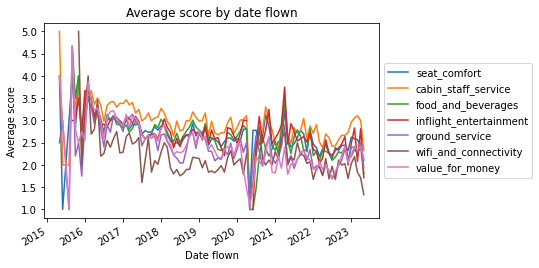

In [66]:
# Convert date_flown to datetime format
data['date_flown'] = pd.to_datetime(data['date_flown'], format='%B %Y')

# Group by date_flown and calculate the mean of the other columns for each group
grouped_data = data.groupby('date_flown').mean()

# Plot the result using a line chart
grouped_data.plot(kind='line', y=['seat_comfort', 'cabin_staff_service', 'food_and_beverages', 'inflight_entertainment', 
                                  'ground_service', 'wifi_and_connectivity', 'value_for_money'])

# Add axis labels and title
plt.xlabel('Date flown')
plt.ylabel('Average score')
plt.title('Average score by date flown')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [67]:
# Convert date_flown to datetime format
data['year_flown'] = pd.to_datetime(data['year_flown'], format='%Y')

# Group by date_flown and calculate the mean of the other columns for each group
grouped_data = data.groupby('year_flown').mean()

# Plot the result using a line chart
grouped_data.plot(kind='line', y=['seat_comfort', 'cabin_staff_service', 'food_and_beverages', 'inflight_entertainment', 
                                  'ground_service', 'wifi_and_connectivity', 'value_for_money'])

# Add axis labels and title
plt.xlabel('Date flown')
plt.ylabel('Average score')
plt.title('Average score by date flown')
plt.show()

KeyError: 'year_flown'

In [ ]:
data['year_flown'] = pd.to_datetime(data['year_flown'], format='%Y')

year_flown_count = data.groupby('year_flown')['reviewText'].count().sort_index()

# Calculate the total number of travellers
total_year_flown = year_flown_count.sum()

# Calculate the percentage of reviews for each airline
year_flown_percentages = year_flown_count / total_year_flown * 100

# Combine the review counts and percentages into a single dataframe
result_df = pd.concat([year_flown_count, round((year_flown_percentages),2)], axis=1, keys=['year_flown_count', 'year_flown_percentages'])

# Print the result dataframe
print(result_df)

# Set the plot style
plt.style.use('ggplot')

# Create the bar plot
result_df['year_flown_count'].plot(kind='bar', color='blue', edgecolor='black', figsize=(8,6))

# Set the title and labels
plt.title('Number of Reviews by Year Flown', fontsize=14)
plt.xlabel('Year Flown', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()